In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<AxesSubplot:xlabel='Class', ylabel='count'>

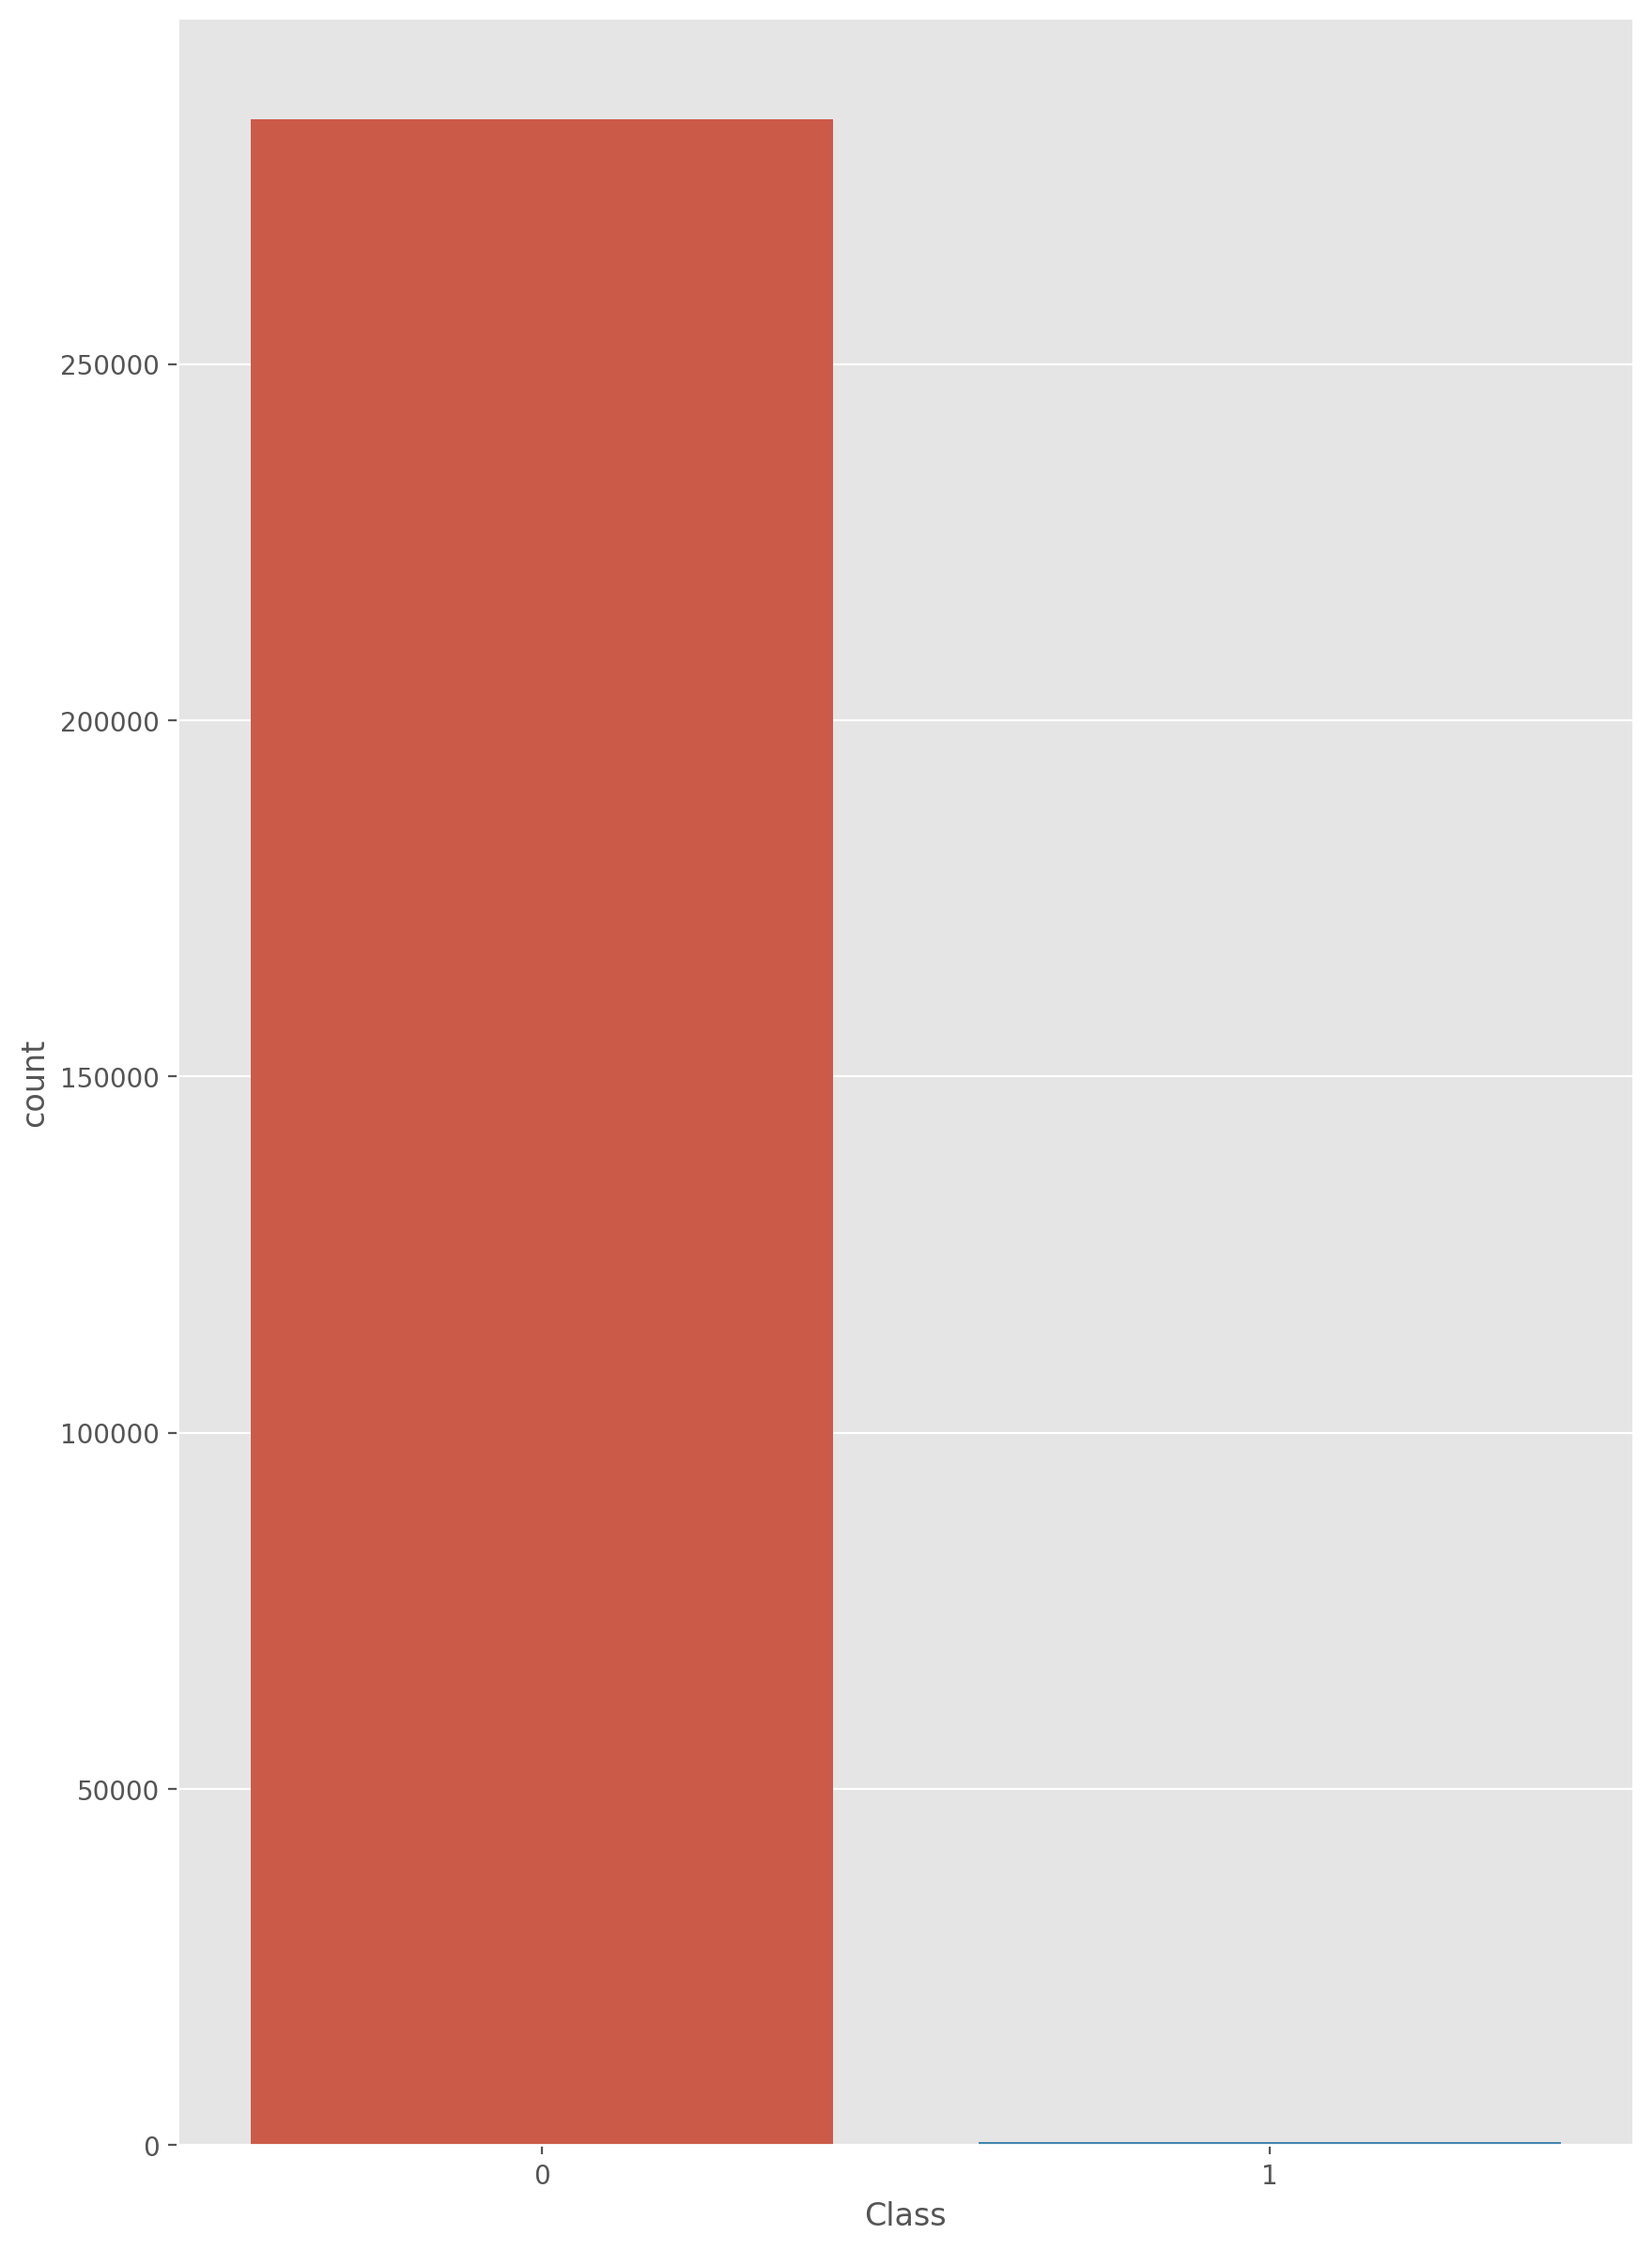

In [4]:
plt.figure(figsize=(10,15),dpi=200)
sns.countplot(df.Class)

In [5]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
class_ratio=df.Class.value_counts(normalize=True)
print("Percentage of Fraufulent Transactions :",class_ratio[1]*100)
print("Percentage of Non Fraufulent Transactions :",class_ratio[0]*100)

Percentage of Fraufulent Transactions : 0.1727485630620034
Percentage of Non Fraufulent Transactions : 99.82725143693798


In [7]:
X=df.drop("Class",axis=1)
Y=df["Class"]

In [8]:
from imblearn.under_sampling import NearMiss
nm_sampler = NearMiss()
x_sampled,y_sampled = nm_sampler.fit_resample(X,Y)

print(x_sampled.shape)
print(y_sampled.shape)

(984, 30)
(984,)


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=5)

In [10]:
print("Train data shape :",x_train.shape)
print("Train labels shape :",y_train.shape)
print("Test data shape :",x_test.shape)
print("Test labels shape :",y_test.shape)

Train data shape : (199364, 30)
Train labels shape : (199364,)
Test data shape : (85443, 30)
Test labels shape : (85443,)


### Decision Tree Classification
- DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier=DecisionTreeClassifier(random_state=2)

In [ ]:
search_params= {
    'max_depth': [5,10,15,20,25,30],
    'criterion': ['entropy','gini'],
    'min_impurity_decrease': [0.05,0.01,0.005,0.0001]
}

In [ ]:
from sklearn.metrics import SCORERS
SCORERS.keys()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
randomized_search=RandomizedSearchCV(
                                    estimator=dt_classifier,
                                    param_distributions=search_params,
                                    n_iter=10,
                                    scoring=['f1'],
                                    refit='f1',
                                    cv=5,
                                    verbose=-1
                                    )

In [ ]:
randomized_search.fit(x_train,y_train)

In [ ]:
print("Best Score :",randomized_search.best_score_)
print("Best Params :",randomized_search.best_params_)

best_dt_model = randomized_search.best_estimator_
pred_train=best_dt_model.predict(x_train)
pred_test=best_dt_model.predict(x_test)

print("Training Accuracy : ",accuracy_score(y_train,pred_train))
print("Testing Accuracy : ",accuracy_score(y_test,pred_test))

print("Training Set f1_score : ",f1_score(y_train,pred_train))
print("Testing Set f1_score : ",f1_score(y_test,pred_test))

print("Precison : ",precision_score(y_test,pred_test))
print("Recall : ",recall_score(y_test,pred_test))

### Random Forest
- RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(random_state=2)

In [ ]:
search_params={
    'n_estimators' : [10,20,30,50,100],
    'max_features' : [15,20,25,30],
    'max_depth' : [3,5,10,15,20,25,30],
    'criterion' : ['entropy','gini'],
    'min_impurity_decrease' : [0.05,0.01,0.005,0.0001]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
randomized_search=RandomizedSearchCV(
                                    estimator=rf_classifier,
                                    param_distributions=search_params,
                                    n_iter=30,
                                    scoring=['f1'],
                                    refit='f1',
                                    cv=5,
                                    verbose=-1
                                    )

In [ ]:
randomized_search.fit(x_train,y_train)

In [ ]:
print("Best Score :",randomized_search.best_score_)
print("Best Params :",randomized_search.best_params_)

best_rf_model = randomized_search.best_estimator_
pred_train=best_dt_model.predict(x_train)
pred_test=best_dt_model.predict(x_test)

print("Training Accuracy : ",accuracy_score(y_train,pred_train))
print("Testing Accuracy : ",accuracy_score(y_test,pred_test))

print("Training Set f1_score : ",f1_score(y_train,pred_train))
print("Testing Set f1_score : ",f1_score(y_test,pred_test))

print("Precison : ",precision_score(y_test,pred_test))
print("Recall : ",recall_score(y_test,pred_test))

### XGBoost
- GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

In [ ]:
from xgboost import XGBClassifier
xgb_classifier=XGBClassifier(random_state=2)

In [ ]:
search_params={
    'n_estimators' : [10,20,30,50,100],
    'max_depth' : [3,5,10,15,20,25,30],
    'gamma' : [0.01,0.05,0.001],
    'learning_rate' : [0.001,0.01,0.1,1]
}

In [ ]:
randomized_search=RandomizedSearchCV(
                                    estimator=xgb_classifier,
                                    param_distributions=search_params,
                                    n_iter=10,
                                    scoring=['f1'],
                                    refit='f1',
                                    cv=5,
                                    verbose=-1
                                    )

In [ ]:
randomized_search.fit(x_train,y_train)

In [ ]:
print("Best Score :",randomized_search.best_score_)
print("Best Params :",randomized_search.best_params_)

best_rf_model = randomized_search.best_estimator_
pred_train=best_xgb_model.predict(x_train)
pred_test=best_xbg_model.predict(x_test)

print("Training Accuracy : ",accuracy_score(y_train,pred_train))
print("Testing Accuracy : ",accuracy_score(y_test,pred_test))

print("Training Set f1_score : ",f1_score(y_train,pred_train))
print("Testing Set f1_score : ",f1_score(y_test,pred_test))

print("Precison : ",precision_score(y_test,pred_test))
print("Recall : ",recall_score(y_test,pred_test))

### Light GBM
- lightgbm.LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=- 1, learning_rate=0.1, n_estimators=100, subsample_for_bin=200000, objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=None, importance_type='split', **kwargs)[source]

In [11]:
from lightbgm import LBGMClassifier
lg_classifier = LGBMClassifier(random_state=2)

ModuleNotFoundError: No module named 'lightbgm'

In [ ]:
search_params={
    'n_estimators' : [10,20,30,50,100],
    'max_depth' : [3,5,10,15,20,25,30],
    'learning_rate' : [0.001,0.01,0.1,1]
}

In [ ]:
randomized_search=RandomizedSearchCV(
                                    estimator=lg_classifier,
                                    param_distributions=search_params,
                                    n_iter=30,
                                    scoring=['f1'],
                                    refit='f1',
                                    cv=5,
                                    verbose=-1
                                    )
randomized_search.fit(x_train,y_train)

In [ ]:
print("Best Score :",randomized_search.best_score_)
print("Best Params :",randomized_search.best_params_)

best_rf_model = randomized_search.best_estimator_
pred_train=best_lg_model.predict(x_train)
pred_test=best_lg_model.predict(x_test)

print("Training Accuracy : ",accuracy_score(y_train,pred_train))
print("Testing Accuracy : ",accuracy_score(y_test,pred_test))

print("Training Set f1_score : ",f1_score(y_train,pred_train))
print("Testing Set f1_score : ",f1_score(y_test,pred_test))

print("Precison : ",precision_score(y_test,pred_test))
print("Recall : ",recall_score(y_test,pred_test))

### Ada Boost
- AdaBoostClassifier(base_estimator=None,*,n_estimators=0,learning_rate=1.0,algorithm='SAMPLE.R',random_state=None)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ad_classifer = AdaBoostClassifier(best_dt_model,n_estimators=20)
ad_classifier.fit(x_train,y_train)

In [ ]:
pred_train=ad_classifier.predict(x_train)
pred_test=ad_classifier.predict(x_test)

print("Training Accuracy : ",accuracy_score(y_train,pred_train))
print("Testing Accuracy : ",accuracy_score(y_test,pred_test))

print("Training Set f1_score : ",f1_score(y_train,pred_train))
print("Testing Set f1_score : ",f1_score(y_test,pred_test))

print("Precison : ",precision_score(y_test,pred_test))
print("Recall : ",recall_score(y_test,pred_test))

### Support Vector Machines
> SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

In [ ]:
from sklearn.svm import SVC
svm_classifier =SVC(degree=1,kernel='linear',random_state=2)
svm_classifier.fit(x_train,y_train)

In [ ]:
pred_train=svm_classifier.predict(x_train)
pred_test=svm_classifier.predict(x_test)

print("Training Accuracy : ",accuracy_score(y_train,pred_train))
print("Testing Accuracy : ",accuracy_score(y_test,pred_test))

print("Training Set f1_score : ",f1_score(y_train,pred_train))
print("Testing Set f1_score : ",f1_score(y_test,pred_test))

print("Precison : ",precision_score(y_test,pred_test))
print("Recall : ",recall_score(y_test,pred_test))

### Stacking

In [ ]:
from sklearn.ensemble import VotingClassifier
vt_classifier= votingClassofier(estimators=[
                                            ('dt',best_dt_model),
                                            ('rf',best_rf_model),
                                            ('xb',best_xgb_model),
                                            ('lg',best_lg_model),
                                            ('ad',ad_classifier),voting='hard'
                                            ])
vt_classifier.fit(x_train,y_train)

In [ ]:
pred_train=vt_classifier.predict(x_train)
pred_test=vt_classifier.predict(x_test)

print("Training Accuracy : ",accuracy_score(y_train,pred_train))
print("Testing Accuracy : ",accuracy_score(y_test,pred_test))

print("Training Set f1_score : ",f1_score(y_train,pred_train))
print("Testing Set f1_score : ",f1_score(y_test,pred_test))

print("Precison : ",precision_score(y_test,pred_test))
print("Recall : ",recall_score(y_test,pred_test))

if light gbm not in ur sys
!pip install lightgbm


In [12]:
!pip install lightgbm

In [13]:
conda list

# packages in environment at C:\Users\Varshith\anaconda3:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0            py39haa95532_0  
alabaster                 0.7.12             pyhd3eb1b0_0  
anaconda                  2021.11                  py39_0  
anaconda-client           1.9.0            py39haa95532_0  
anaconda-navigator        2.1.1                    py39_0  
anaconda-project          0.10.1             pyhd3eb1b0_0  
anyio                     2.2.0            py39haa95532_2  
appdirs                   1.4.4              pyhd3eb1b0_0  
argh                      0.26.2           py39haa95532_0  
argon2-cffi               20.1.0           py39h2bbff1b_1  
arrow                     0.13.1           py39haa95532_0  
asn1crypto                1.4.0                      py_0  
astroid                   2.6.6            py39haa95532_0  
astropy                   4.3.1            py39hc7d831d_0  
async_generator           1.10   